In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [20]:
tc1 = pd.read_excel("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Multilinear regression/ToyotaCorolla.xlsx")

## EDA

In [21]:
tc1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [22]:
tc1.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [24]:
tc1 = tc1.rename(columns={"Age_08_04":"age","Quarterly_Tax":"QT"})

In [25]:
tc1.columns

Index(['Id', 'Model', 'Price', 'age', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'QT', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [26]:
tc = tc1.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [27]:
tc

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [29]:
tc.isnull().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

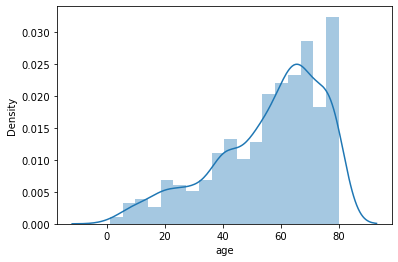

In [30]:
sns.distplot(tc['age'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

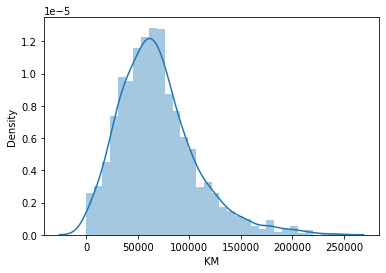

In [31]:
sns.distplot(tc['KM'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

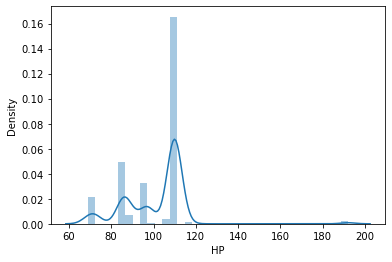

In [32]:
sns.distplot(tc['HP'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

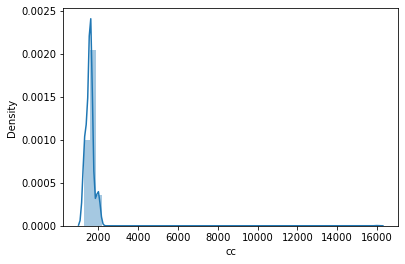

In [33]:
sns.distplot(tc['cc'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

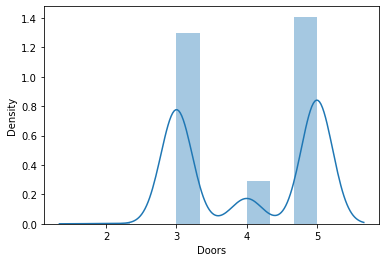

In [34]:
sns.distplot(tc['Doors'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

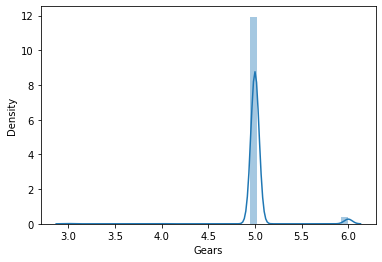

In [35]:
sns.distplot(tc['Gears'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QT', ylabel='Density'>

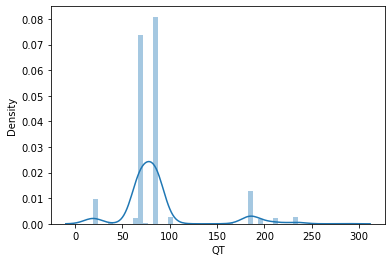

In [36]:
sns.distplot(tc['QT'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

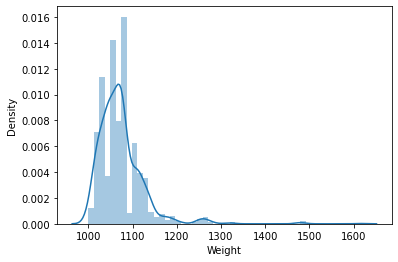

In [37]:
sns.distplot(tc['Weight'])

## Correlation

In [38]:
tc.corr()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


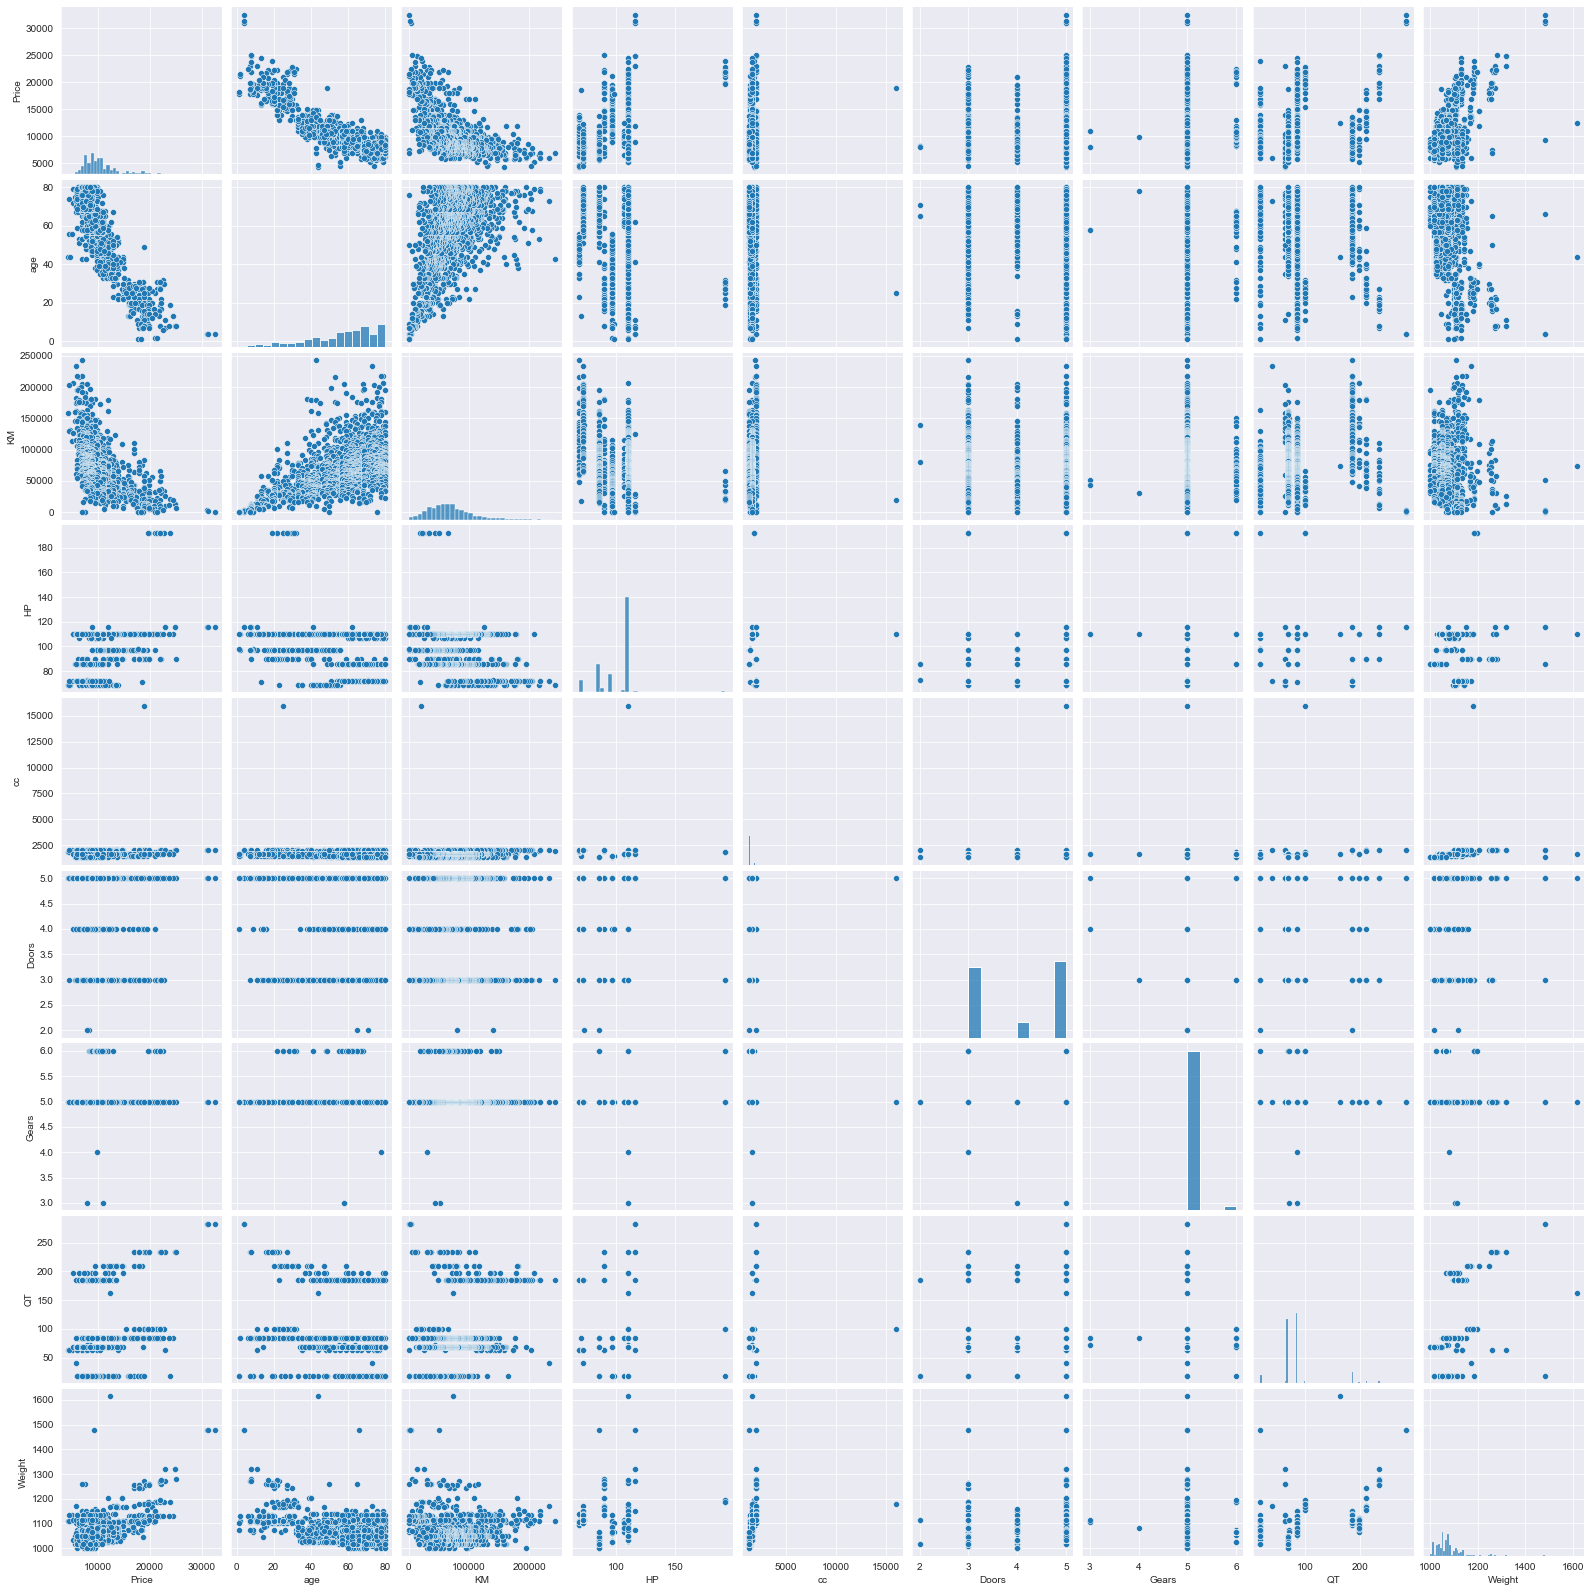

In [39]:
sns.set_style(style='darkgrid')
sns.pairplot(tc)

## Model

In [40]:
model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=tc).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:22:44   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
rsq_age = smf.ols('age~KM+HP+cc+Doors+Gears+QT+Weight',data=tc).fit().rsquared
vif_age = 1/1-rsq_age
rsq_KM = smf.ols('KM~age+HP+cc+Doors+Gears+QT+Weight',data=tc).fit().rsquared
vif_KM = 1/1-rsq_KM
rsq_HP = smf.ols('HP~age+KM+cc+Doors+Gears+QT+Weight',data=tc).fit().rsquared
vif_HP = 1/1-rsq_HP
rsq_cc = smf.ols('cc~age+HP+KM+Doors+Gears+QT+Weight',data=tc).fit().rsquared
vif_cc = 1/1-rsq_cc
rsq_Doors = smf.ols('Doors~age+HP+cc+KM+Gears+QT+Weight',data=tc).fit().rsquared
vif_Doors = 1/1-rsq_Doors
rsq_Gears = smf.ols('Gears~age+HP+cc+Doors+KM+QT+Weight',data=tc).fit().rsquared
vif_Gears = 1/1-rsq_Gears
rsq_QT = smf.ols('QT~age+HP+cc+Doors+Gears+KM+Weight',data=tc).fit().rsquared
vif_QT = 1/1-rsq_QT
rsq_Wt = smf.ols('Weight~age+HP+cc+Doors+Gears+QT+KM',data=tc).fit().rsquared
vif_Wt = 1/1-rsq_Wt


In [47]:
vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Wt

(0.5306110001585407,
 0.5691828108192001,
 0.7045120643952836,
 0.8591847822372807,
 0.8646216812204686,
 0.9101474915800829,
 0.432632460816607,
 0.3973899685256759)

In [48]:
df1 = {'Variables':['age','KM','HP','cc','Doors','Gears','QT','Wt'],'VIF':[0.5306,0.5691,0.7045,0.8591,0.8646,0.9101,0.4326,0.3973]}

In [50]:
df = pd.DataFrame(df1)
df

,Variables,VIF
0,age,0.5306
1,KM,0.5691
2,HP,0.7045
3,cc,0.8591
4,Doors,0.8646
5,Gears,0.9101
6,QT,0.4326
7,Wt,0.3973


## Residual Analysis

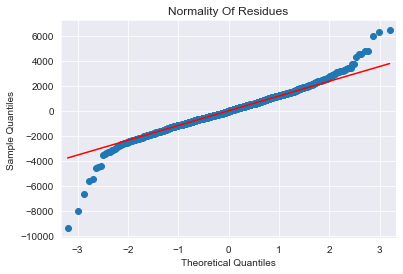

In [51]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normality Of Residues')
plt.show()

## Homoscedacity

In [52]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

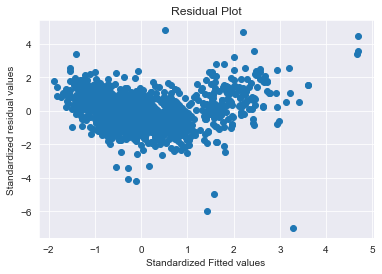

In [53]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual vs Regressors plot

eval_env: 1


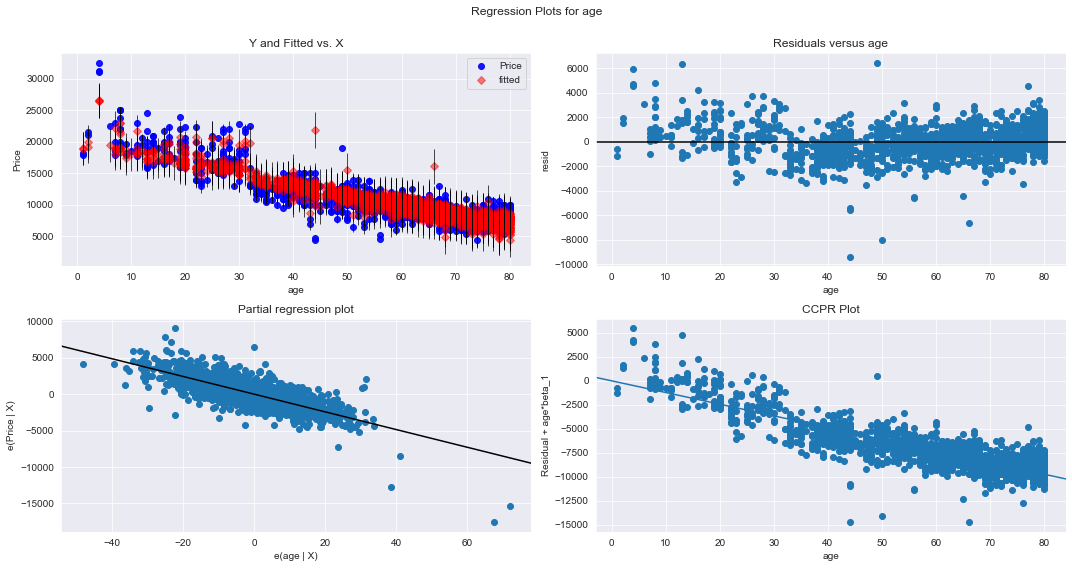

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

eval_env: 1


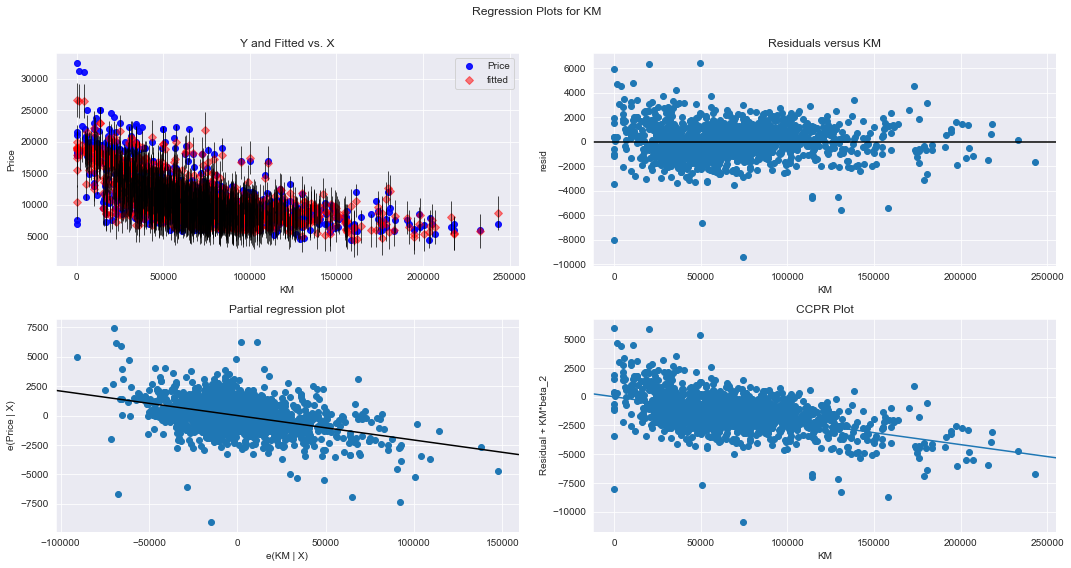

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


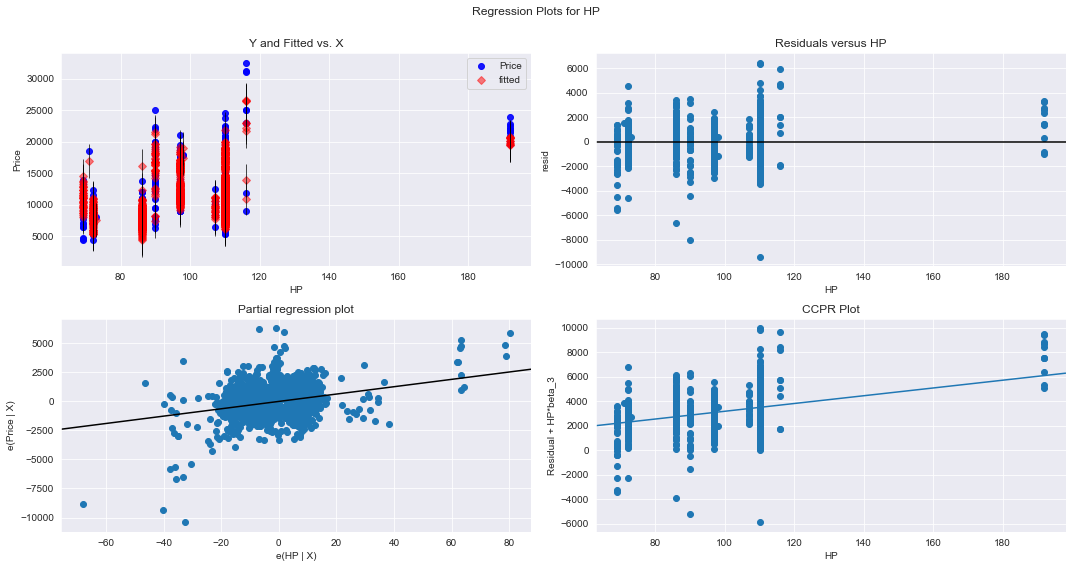

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


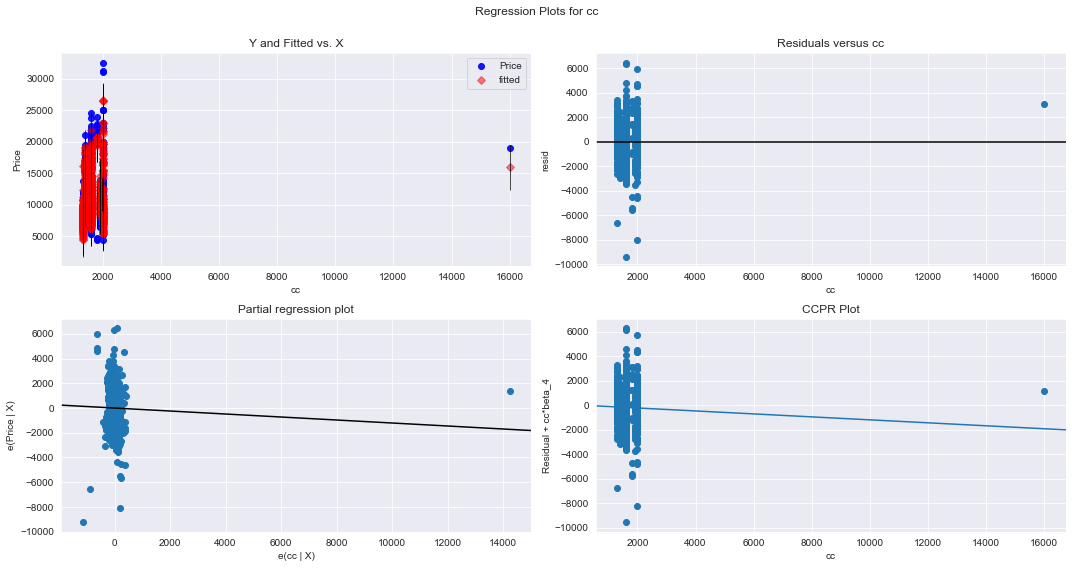

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


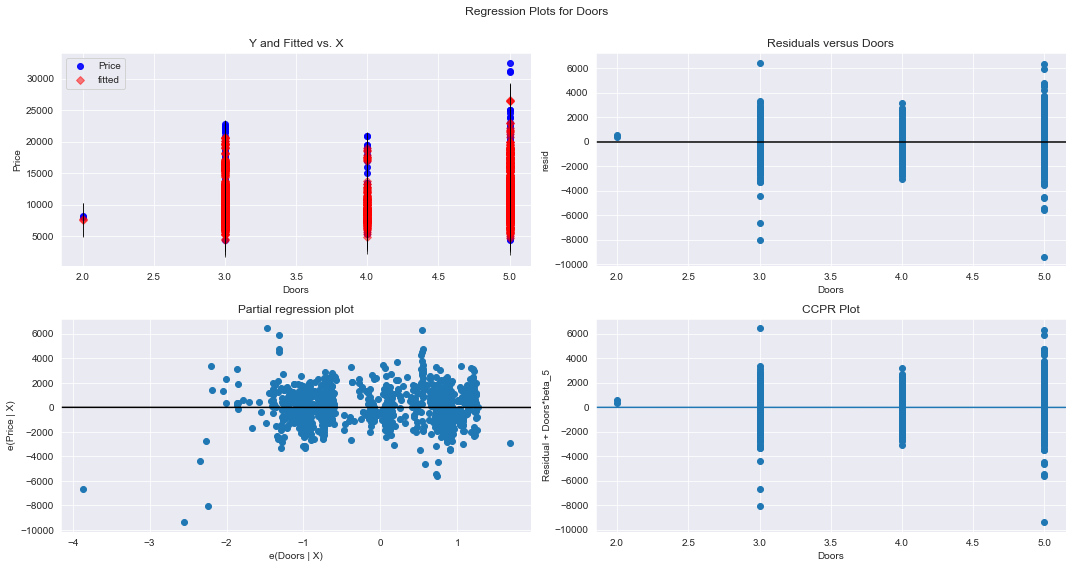

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


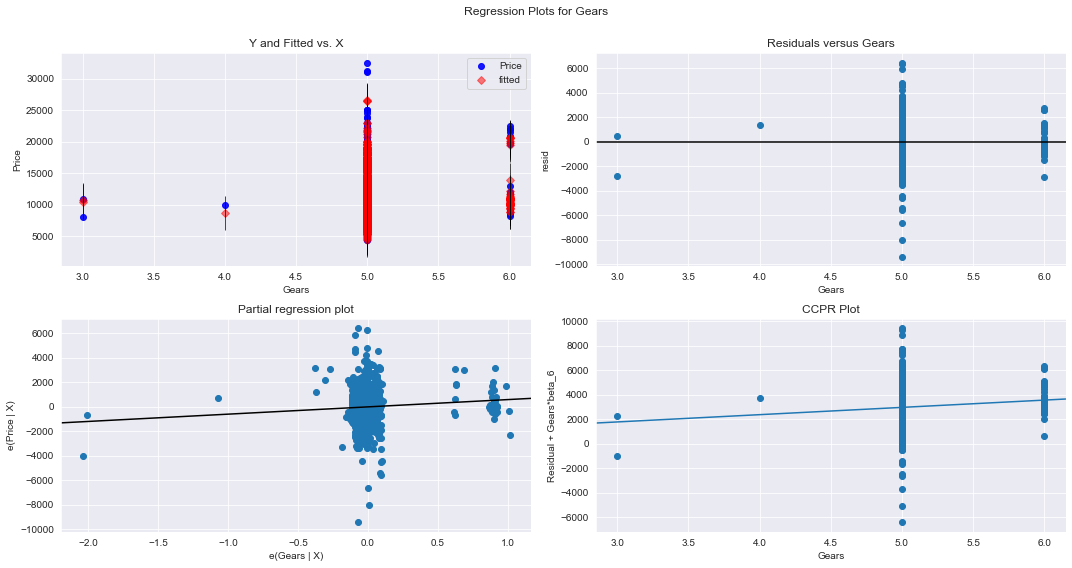

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


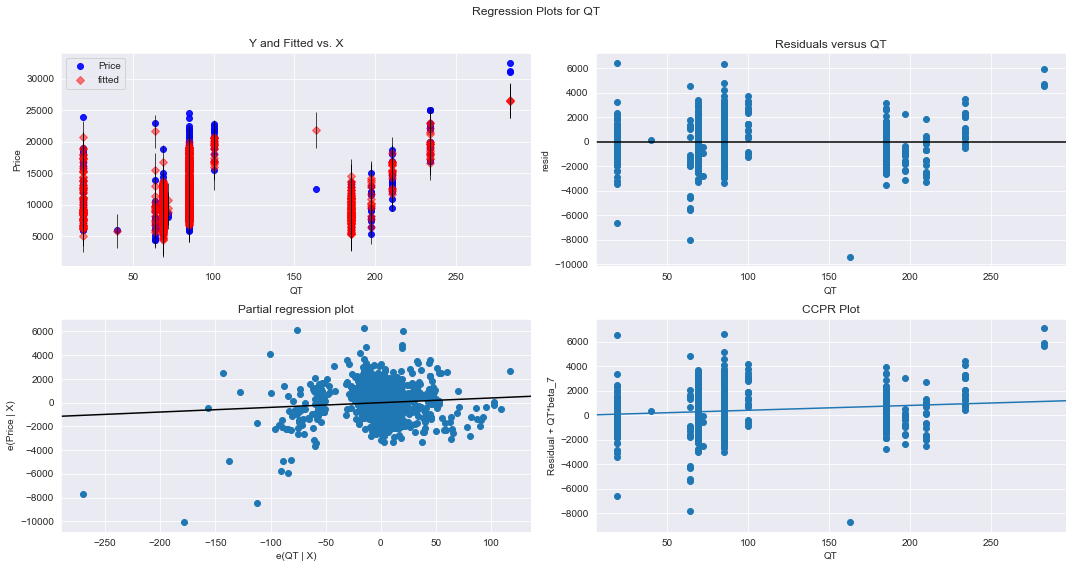

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

eval_env: 1


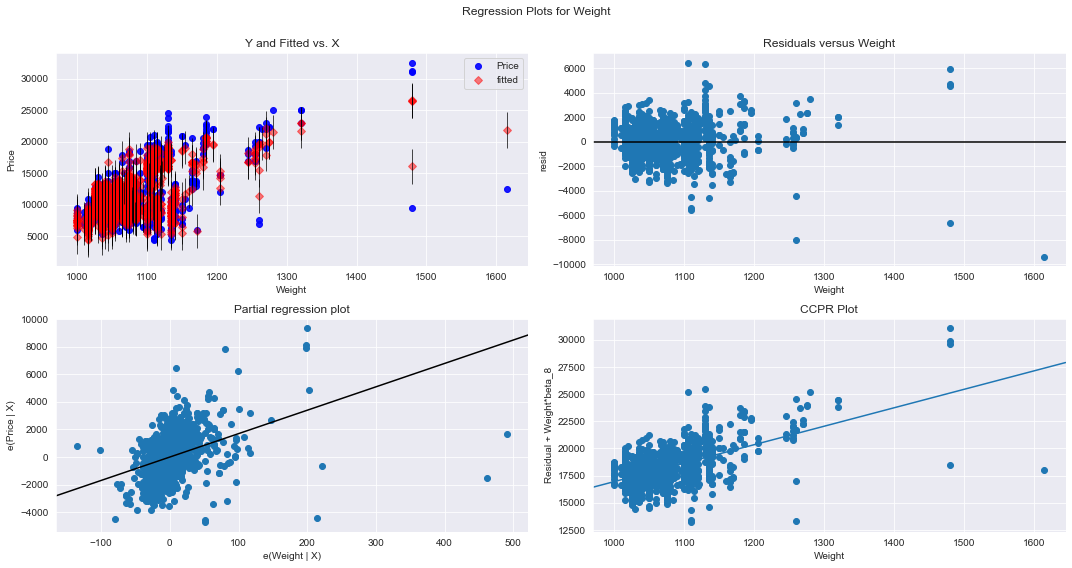

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

## Influence Points

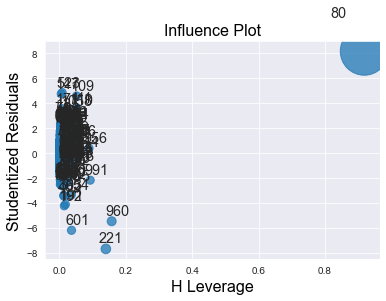

In [64]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [66]:
k = tc.shape[1]
n = tc.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [67]:
tc[tc.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [68]:
tc.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Model Improvement

In [69]:
tc_new = tc.drop(tc.index[80],axis=0).reset_index()

In [70]:
tc_new

,index,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


## New Model

In [71]:
final_model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=tc_new).fit()

In [73]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:11:03   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
final_model.rsquared,final_model.rsquared_adj

(0.8693790488655818, 0.8686462525057814)

## Prediction using Model

In [81]:
df = pd.DataFrame({'age':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'QT':210,'Weight':1165},index=[1])

In [79]:
df

,age,KM,HP,cc,Doors,Gears,QT,Wt
1,26,48000,90,2000,3,5,210,1165


In [82]:
final_model.predict(df)

1    16149.527067
dtype: float64